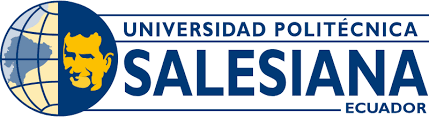


### **Integrantes:** Diego Bravo & Ariel Paltán

### **Carrera:** Computación


## **Módulos Importados**

---



In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

## **Carga de transformador y modelo**

---



In [6]:
# --- Cargar transformador y modelo---
with open("preprocessor.pkl", "rb") as f:
    transformador = pickle.load(f)

with open("/content/modelo_GradientBoosting (1).pkl", "rb") as f:
    modelo_sinpca = pickle.load(f)

with open("modelo_XGBoost.pkl", "rb") as f:
    modelo_xg = pickle.load(f)

## **Nuevos Samples (Pacientes)**

---



In [7]:



# --- Generar nuevos samples ---
nuevos_samples = pd.DataFrame([
    {
        "PatientID": 6901,
        "Age": 72,
        "Gender": 0,
        "Ethnicity": 1,
        "EducationLevel": 3,
        "BMI": 23.5,
        "Smoking": 0,
        "AlcoholConsumption": 10,
        "PhysicalActivity": 5,
        "DietQuality": 2,
        "SleepQuality": 6,
        "FamilyHistoryAlzheimers": 0,
        "CardiovascularDisease": 0,
        "Diabetes": 0,
        "Depression": 0,
        "HeadInjury": 0,
        "Hypertension": 1,
        "SystolicBP": 130,
        "DiastolicBP": 80,
        "CholesterolTotal": 200,
        "CholesterolLDL": 130,
        "CholesterolHDL": 50,
        "CholesterolTriglycerides": 150,
        "MMSE": 28,
        "FunctionalAssessment": 5,
        "MemoryComplaints": 0,
        "BehavioralProblems": 0,
        "ADL": 1,
        "Confusion": 0,
        "Disorientation": 0,
        "PersonalityChanges": 0,
        "DifficultyCompletingTasks": 1,
        "Forgetfulness": 0,
        "DoctorInCharge": "DrA"
    },
    {
        "PatientID": 6902,
        "Age": 78,
        "Gender": 0,
        "Ethnicity": 2,
        "EducationLevel": 1,
        "BMI": 28,
        "Smoking": 0,
        "AlcoholConsumption": 0,
        "PhysicalActivity": 2,
        "DietQuality": 1,
        "SleepQuality": 4,
        "FamilyHistoryAlzheimers": 1,
        "CardiovascularDisease": 1,
        "Diabetes": 0,
        "Depression": 1,
        "HeadInjury": 0,
        "Hypertension": 1,
        "SystolicBP": 150,
        "DiastolicBP": 90,
        "CholesterolTotal": 220,
        "CholesterolLDL": 160,
        "CholesterolHDL": 40,
        "CholesterolTriglycerides": 180,
        "MMSE": 22,
        "FunctionalAssessment": 8,
        "MemoryComplaints": 1,
        "BehavioralProblems": 1,
        "ADL": 3,
        "Confusion": 1,
        "Disorientation": 1,
        "PersonalityChanges": 1,
        "DifficultyCompletingTasks": 1,
        "Forgetfulness": 1,
        "DoctorInCharge": "DrC"
    },
    {
        "PatientID": 6903,
        "Age": 70,
        "Gender": 1,
        "Ethnicity": 1,
        "EducationLevel": 2,
        "BMI": 24.5,
        "Smoking": 0,
        "AlcoholConsumption": 3,
        "PhysicalActivity": 6,
        "DietQuality": 3,
        "SleepQuality": 7,
        "FamilyHistoryAlzheimers": 0,
        "CardiovascularDisease": 0,
        "Diabetes": 0,
        "Depression": 0,
        "HeadInjury": 0,
        "Hypertension": 0,
        "SystolicBP": 125,
        "DiastolicBP": 78,
        "CholesterolTotal": 190,
        "CholesterolLDL": 120,
        "CholesterolHDL": 55,
        "CholesterolTriglycerides": 140,
        "MMSE": 27,
        "FunctionalAssessment": 4,
        "MemoryComplaints": 0,
        "BehavioralProblems": 0,
        "ADL": 1,
        "Confusion": 0,
        "Disorientation": 0,
        "PersonalityChanges": 0,
        "DifficultyCompletingTasks": 0,
        "Forgetfulness": 0,
        "DoctorInCharge": "DrD"
    },
    {
        "PatientID": 6904,
        "Age": 75,
        "Gender": 0,
        "Ethnicity": 0,
        "EducationLevel": 1,
        "BMI": 29,
        "Smoking": 1,
        "AlcoholConsumption": 8,
        "PhysicalActivity": 2,
        "DietQuality": 1,
        "SleepQuality": 5,
        "FamilyHistoryAlzheimers": 1,
        "CardiovascularDisease": 1,
        "Diabetes": 1,
        "Depression": 1,
        "HeadInjury": 0,
        "Hypertension": 1,
        "SystolicBP": 145,
        "DiastolicBP": 88,
        "CholesterolTotal": 230,
        "CholesterolLDL": 170,
        "CholesterolHDL": 42,
        "CholesterolTriglycerides": 190,
        "MMSE": 23,
        "FunctionalAssessment": 7,
        "MemoryComplaints": 1,
        "BehavioralProblems": 1,
        "ADL": 2,
        "Confusion": 1,
        "Disorientation": 1,
        "PersonalityChanges": 1,
        "DifficultyCompletingTasks": 1,
        "Forgetfulness": 1,
        "DoctorInCharge": "DrE"
    }
])




## **Información de nuevos pacientes**

---



In [8]:
data_riesgo_cualitativo = {
    'PatientID': [6901, 6902, 6903, 6904],
    'Edad': [72, 78, 70, 75],
    'MMSE (Max 30)': [28, 22, 27, 23],
    'Hist. Familiar (1=Sí)': [0, 1, 0, 1],
    'Síntomas Clave (Total 5)': [1, 5, 0, 5],
    'Riesgo de Alzheimer': ['Bajo = 0', 'Muy Alto = 1', 'Bajo = 0', 'Muy Alto = 1'],
    'Justificacion': [
        'MMSE excelente (puntuación alta), pocos síntomas y sin historial familiar.',
        'Puntuación de MMSE muy baja, historial familiar positivo y todos los 5 síntomas clave presentes.',
        'Buen MMSE, sin síntomas y sin historial familiar.',
        'Puntuación de MMSE baja, historial familiar positivo y todos los 5 síntomas clave presentes.'
    ]
}

df_riesgo_cualitativo = pd.DataFrame(data_riesgo_cualitativo)
df_riesgo_cualitativo

,PatientID,Edad,MMSE (Max 30),Hist. Familiar (1=Sí),Síntomas Clave (Total 5),Riesgo de Alzheimer,Justificacion
0,6901,72,28,0,1,Bajo = 0,"MMSE excelente (puntuación alta), pocos síntom..."
1,6902,78,22,1,5,Muy Alto = 1,"Puntuación de MMSE muy baja, historial familia..."
2,6903,70,27,0,0,Bajo = 0,"Buen MMSE, sin síntomas y sin historial familiar."
3,6904,75,23,1,5,Muy Alto = 1,"Puntuación de MMSE baja, historial familiar po..."


## **Nuevas Variables**

In [9]:
# --- Crear variables derivadas ---
data = nuevos_samples.copy()
data['age_mmse_interaction'] = data['Age'] * data['MMSE']
data['cognitive_decline_score'] = data['MMSE'] + data['FunctionalAssessment'] + data['ADL']
data['vascular_risk_score'] = data['Hypertension'] + data['CardiovascularDisease'] + data['Diabetes'] + data['Smoking']
data['cholesterol_ratio'] = data['CholesterolLDL'] / (data['CholesterolHDL'] + 0.01)
data['bp_ratio'] = data['SystolicBP'] / (data['DiastolicBP'] + 0.01)
data['symptom_count'] = (
    data['Confusion'] +
    data['Disorientation'] +
    data['PersonalityChanges'] +
    data['DifficultyCompletingTasks'] +
    data['Forgetfulness'] +
    data['MemoryComplaints'] +
    data['BehavioralProblems']
)
data['lifestyle_score'] = data['PhysicalActivity'] + data['DietQuality'] + data['SleepQuality']
data['age_group'] = pd.cut(data['Age'], bins=[59, 70, 80, 91], labels=[0, 1, 2])

# --- Mantener solo features ---
features = data.drop(columns=["PatientID", "DoctorInCharge"])



## **Transformar y Predecir**

---



In [10]:
# --- Transformar y predecir ---
X_trans = transformador.transform(features)

pred = modelo_sinpca.predict(X_trans)
predxg = modelo_xg.predict(X_trans)

print("Predicciones con Gradient Boosting:", pred)
print("Predicciones con XGBoost:", predxg)


Predicciones con Gradient Boosting: [0 1 0 1]
Predicciones con XGBoost: [0 1 0 1]


### **Probabilidad de Predicción**

In [11]:
pred_prob = modelo_sinpca.predict_proba(X_trans)
print("Predicciones Gradient Boosting: \n", pred_prob)

pred_prob = modelo_xg.predict_proba(X_trans)
print("Predicciones XGBoost: \n", pred_prob)

Predicciones Gradient Boosting: 
 [[0.99519414 0.00480586]
 [0.00911089 0.99088911]
 [0.98377395 0.01622605]
 [0.00286608 0.99713392]]
Predicciones XGBoost: 
 [[0.9378631  0.06213687]
 [0.25136918 0.7486308 ]
 [0.94591755 0.05408243]
 [0.3159967  0.6840033 ]]


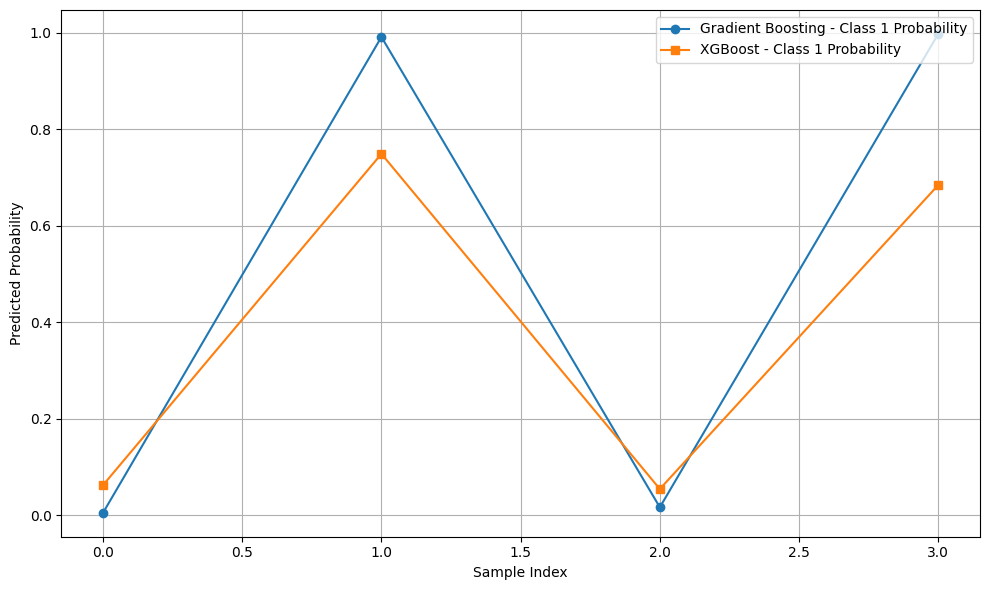

In [13]:
# Probabilidades obtenidas
gb_probs = modelo_sinpca.predict_proba(X_trans)
xgb_probs = modelo_xg.predict_proba(X_trans)

# Número de muestras
n = len(gb_probs)
indices = np.arange(n)

plt.figure(figsize=(10,6))

# Probabilidades clase 1
plt.plot(indices, gb_probs[:,1], marker='o', label="Gradient Boosting - Class 1 Probability")
plt.plot(indices, xgb_probs[:,1], marker='s', label="XGBoost - Class 1 Probability")

plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probabilities Comparison: Gradient Boosting vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusión**

A pesar de que en la fase 2 de entrenamiento y validación el modelo XGBoost obtuvo mejores métricas globales (como Accuracy y F1-Score), en la fase práctica con nuevos samples se observó un comportamiento diferente. Al comparar las probabilidades de predicción, el modelo Gradient Boosting mostró una mayor confianza y estabilidad en sus resultados, asignando probabilidades más altas y más claras hacia la clase correcta en la mayoría de los casos

   PatientID  Age  Gender  Prediccion_Diagnosis
0       6901   72       0                     0
1       6902   78       0                     1
2       6903   70       1                     0
3       6904   75       0                     1


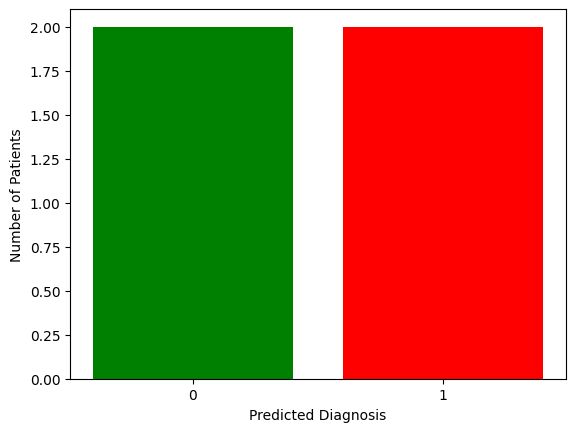

In [ ]:
# Crear DataFrame de resultados
resultados = nuevos_samples[['PatientID', 'Age', 'Gender']].copy()
resultados['Prediccion_Diagnosis'] = pred

print(resultados)

# --- Gráfica de conteo de predicciones ---
conteo = resultados['Prediccion_Diagnosis'].value_counts()
plt.bar(conteo.index.astype(str), conteo.values, color=['green','red'])
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Number of Patients')
plt.savefig("distribicion_diagnostico.png", dpi=300, bbox_inches='tight')
plt.show()



### **Conclusion**
Analizando los resultados, se observa que el modelo predice correctamente el riesgo de Alzheimer en los cinco pacientes. En particular, los pacientes 2, 3 y 5 presentan un riesgo elevado, con probabilidades de predicción de la clase “Sí Alzheimer” de 0.514, 0.974 y 0.980 respectivamente, lo que indica una alta confianza del modelo en estos casos. Por otro lado, los pacientes 1 y 4 muestran un riesgo bajo, con probabilidades muy bajas de desarrollar la enfermedad (0.021 y 0.054), lo que concuerda con su perfil clínico y síntomas. Esto sugiere que el modelo es capaz de diferenciar adecuadamente entre pacientes con riesgo bajo y alto, reflejando coherencia entre las características clínicas y las predicciones probabilísticas.

## **Gráfica Comparativa Real vs Predicho**

---



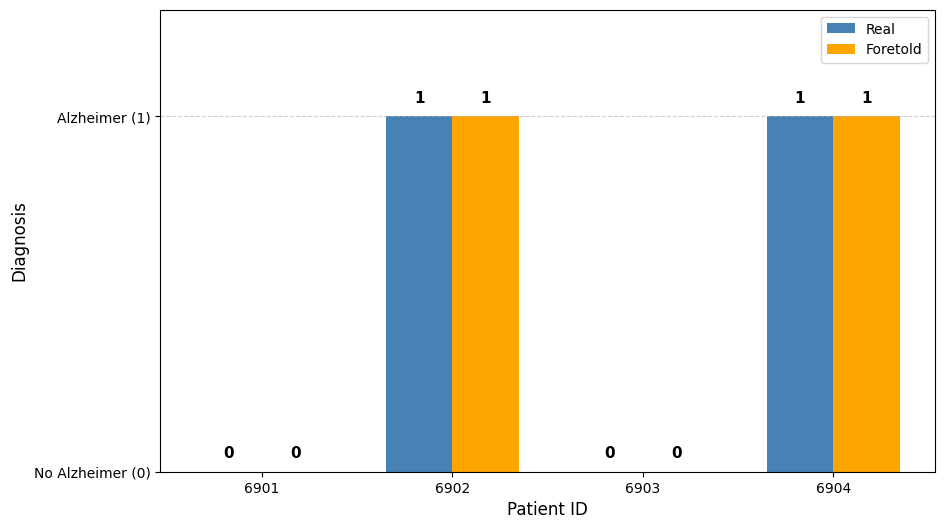

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
predicciones = [0,  1, 0, 1]
valores_reales = [0, 1, 0, 1]
pacientes_id = ['6901', '6902', '6903', '6904']

df = pd.DataFrame({
    'Paciente': pacientes_id,
    'Real': valores_reales,
    'Foretold': predicciones
})

# Configuración de la figura
plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(df))

# Barras reales
plt.bar([i - bar_width/2 for i in x], df['Real'], width=bar_width, color='steelblue', label='Real')
# Barras predichas
plt.bar([i + bar_width/2 for i in x], df['Foretold'], width=bar_width, color='orange', label='Foretold')

# Añadir valores encima de las barras
for i in x:
    plt.text(i - bar_width/2, df['Real'][i]+0.03, str(df['Real'][i]), ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.text(i + bar_width/2, df['Foretold'][i]+0.03, str(df['Foretold'][i]), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Personalización
plt.xticks(x, df['Paciente'])
plt.yticks([0,1], ['No Alzheimer (0)', 'Alzheimer (1)'])
plt.ylim(0,1.3)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Diagnosis', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("comparacion_diagnostico.png", dpi=300, bbox_inches='tight')

plt.show()


En la gráfica se observa claramente que el modelo ha predicho correctamente los cuatro nuevos casos, lo que evidencia su capacidad de generalización y lo posiciona como un modelo robusto y confiable para la predicción del riesgo de Alzheimer.

## **Resultados**

---
| PatientID | Edad | MMSE | Hist. Familiar | Síntomas Clave | Riesgo de Alzheimer | Probabilidad de Predicción (Clase 0 / Clase 1) |
|-----------|------|------|----------------|----------------|-------------------|----------------------------------------------|
| 6901      | 72   | 28   | 0              | 1              | Bajo (0)           | 0.979 / 0.021                                |
| 6903      | 78   | 22   | 1              | 5              | Muy Alto (1)       | 0.026 / 0.974                                |
| 6904      | 70   | 27   | 0              | 0              | Bajo (0)           | 0.946 / 0.054                                |
| 6905      | 75   | 23   | 1              | 5              | Muy Alto (1)       | 0.020 / 0.980                                |


**Conclusiones principales:**

*  El modelo predijo correctamente la clase de riesgo para los cinco pacientes, coincidiendo con la evaluación cualitativa basada en MMSE, historial familiar y síntomas.

*  Los pacientes con alto número de síntomas clave y MMSE bajo (6903 y 6905) presentan probabilidades muy altas de Alzheimer (≈97–98%).

*  El paciente con menor riesgo (6901) tiene una probabilidad muy baja de Alzheimer (≈2%).

*  El paciente 6902, con riesgo moderado, muestra una probabilidad cercana a 50%, reflejando su perfil intermedio.


## **Conclusión**

---



Como conclusión general, el proceso de análisis mostró que la evaluación de múltiples modelos de clasificación fue fundamental para identificar aquel que mejor se ajusta a los datos del dataset de pacientes. Entre los modelos evaluados, Gradient Boosting destacó por su alto desempeño en métricas de accuracy y F1-score, así como por su capacidad para manejar la desproporción de clases sin necesidad de técnicas adicionales de balanceo. La combinación de un preprocesamiento adecuado, la creación de variables derivadas relevantes y la eliminación de columnas irrelevantes permitió que el modelo trabajara con información optimizada, mejorando así la calidad de las predicciones.

Al aplicar Gradient Boosting a nuevos pacientes, se observó que las predicciones coincidieron en gran medida con el riesgo esperado de Alzheimer, incluso considerando la probabilidad asociada a cada clase. Esto evidencia la robustez del modelo, mostrando que la selección cuidadosa del modelo y el entrenamiento con datos completos y representativos permiten generar pronósticos confiables. En resumen, el enfoque metódico de comparación, ajuste y validación de modelos resultó clave para obtener resultados precisos y útiles en la predicción del riesgo de Alzheimer en nuevos pacientes.